In [25]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Function to count total files in a folder
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Define paths for training, testing, and validation datasets
train_files_Apple_alternaria_leaf_spot = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Train/Apple___alternaria_leaf_spot"
train_files_Apple_black_rot = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Train/Apple___black_rot"
train_files_Apple_brown_spot = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Train/Apple___brown_spot"
train_files_Apple_healthy = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Train/Apple___healthy"
train_files_Apple___rust = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Train/Apple___rust"
train_files_Apple___scab = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Train/Apple___scab"

test_files_Apple_alternaria_leaf_spot = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Test/Apple___alternaria_leaf_spot"
test_files_Apple_black_rot = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Test/Apple___black_rot"
test_files_Apple_brown_spot = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Test/Apple___brown_spot"
test_files_Apple_healthy = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Test/Apple___healthy"
test_files_Apple___rust = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Test/Apple___rust"
test_files_Apple___scab = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Test/Apple___scab"


valid_files_Apple_alternaria_leaf_spot = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Validation/Apple___alternaria_leaf_spot"
valid_files_Apple_black_rot = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Validation/Apple___black_rot"
valid_files_Apple_brown_spot = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Validation/Apple___brown_spot"
valid_files_Apple_healthy = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Validation/Apple___healthy"
valid_files_Apple___rust = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Validation/Apple___rust"
valid_files_Apple___scab = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Validation/Apple___scab"


# Print number of files in each category
print("Number of Apple_alternaria_leaf_spot leaf images in training set:", total_files(train_files_Apple_alternaria_leaf_spot))
print("Number of Apple_black_rot leaf images in training set:", total_files(train_files_Apple_black_rot))
print("Number of Apple_brown_spot leaf images in training set:", total_files(train_files_Apple_brown_spot))
print("Number of train_files_Apple_healthy leaf images in training set:", total_files(train_files_Apple_healthy))
print("Number of train_files_Apple___rust leaf images in training set:", total_files(train_files_Apple___rust))
print("Number of train_files_Apple___scab leaf images in training set:", total_files(train_files_Apple___scab))

Number of Apple_alternaria_leaf_spot leaf images in training set: 396
Number of Apple_black_rot leaf images in training set: 497
Number of Apple_brown_spot leaf images in training set: 346
Number of train_files_Apple_healthy leaf images in training set: 1296
Number of train_files_Apple___rust leaf images in training set: 495
Number of train_files_Apple___scab leaf images in training set: 504


In [27]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
# Generate augmented images and save to disk for training
augmented_train_dir = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/t_aug"

# Train generator
train_generator = train_datagen.flow_from_directory(
    "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Train",
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    save_to_dir=augmented_train_dir,
    save_prefix='aug_',
    save_format='jpg'
)

Found 3534 images belonging to 6 classes.


In [29]:
# Generate augmented images and save to disk for validation
augmented_validation_dir = "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/v_aug"

# Train generator
validation_generator = test_datagen.flow_from_directory(
    "B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Validation",
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    save_to_dir=augmented_validation_dir,
    save_prefix='aug_',
    save_format='jpg'
)

Found 397 images belonging to 6 classes.


In [39]:
# Constructing the CNN model with 3 convolutional layers
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [40]:
# Compile the model
initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 223, 223, 32)      896       
                                                                 
 batch_normalization_9 (Batc  (None, 223, 223, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_10 (Bat  (None, 109, 109, 64)     256       
 chNormalization)                                                
                                                      

In [42]:
# Define callbacks for saving the best model during training
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

In [43]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17178044859687368187
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5682233344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6534924121304749517
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


In [44]:
# Train the model with data augmentation
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    callbacks=[checkpoint])

Epoch 1/20
111/111 [==============================] - ETA: 0s - loss: 8.7186 - accuracy: 0.4372
Epoch 1: val_accuracy improved from -inf to 0.19395, saving model to best_model.h5
111/111 [==============================] - 46s 397ms/step - loss: 8.7186 - accuracy: 0.4372 - val_loss: 5.7526 - val_accuracy: 0.1940
Epoch 2/20
111/111 [==============================] - ETA: 0s - loss: 4.1630 - accuracy: 0.5311
Epoch 2: val_accuracy improved from 0.19395 to 0.49118, saving model to best_model.h5
111/111 [==============================] - 27s 246ms/step - loss: 4.1630 - accuracy: 0.5311 - val_loss: 2.2618 - val_accuracy: 0.4912
Epoch 3/20
111/111 [==============================] - ETA: 0s - loss: 2.7215 - accuracy: 0.5399
Epoch 3: val_accuracy did not improve from 0.49118
111/111 [==============================] - 26s 229ms/step - loss: 2.7215 - accuracy: 0.5399 - val_loss: 1.8961 - val_accuracy: 0.4786
Epoch 4/20
111/111 [==============================] - ETA: 0s - loss: 1.7368 - accuracy: 0

In [45]:
# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory("B:/VESP/6th Sem/CPE/CAD WEB/CAD WEB 2/apple data/Test",
                                                  target_size=(225, 225),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=False)  # To preserve the order of predictions
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

Found 397 images belonging to 6 classes.
13/13 [==============================] - 2s 172ms/step


In [46]:
#Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())

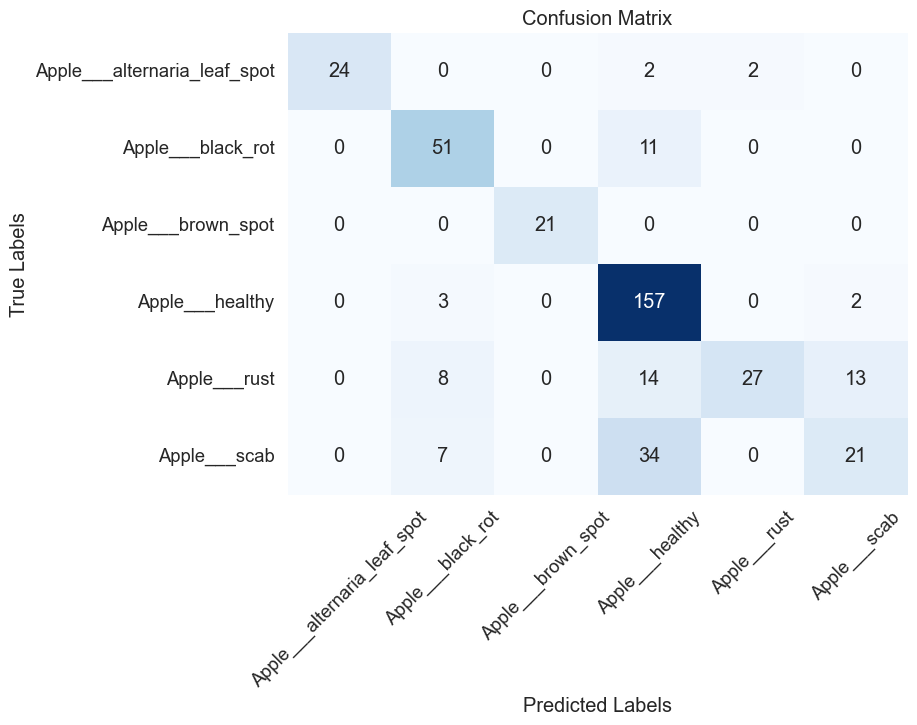

In [47]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [48]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
                              precision    recall  f1-score   support

Apple___alternaria_leaf_spot       1.00      0.86      0.92        28
           Apple___black_rot       0.74      0.82      0.78        62
          Apple___brown_spot       1.00      1.00      1.00        21
             Apple___healthy       0.72      0.97      0.83       162
                Apple___rust       0.93      0.44      0.59        62
                Apple___scab       0.58      0.34      0.43        62

                    accuracy                           0.76       397
                   macro avg       0.83      0.74      0.76       397
                weighted avg       0.77      0.76      0.74       397

